# Pre-Experiments

In [1]:
import torch
import numpy as np
import sklearn

## Data

In [95]:
from sklearn.datasets import make_classification
separable = False
while not separable:
    samples = make_classification(n_samples=1000, n_features=4000, n_redundant=50, n_informative=50, n_clusters_per_class=1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = True #any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])

X, y = samples

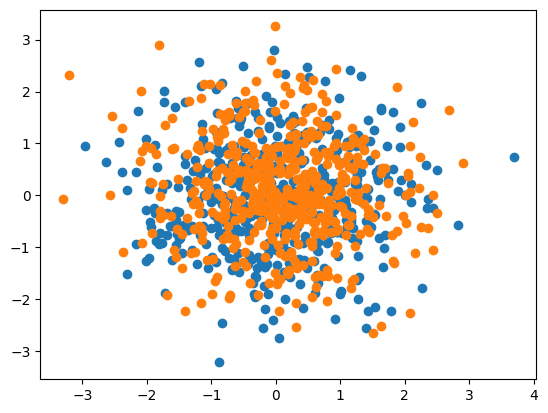

In [100]:
from matplotlib import pyplot as plt
plt.scatter(X[:, 2][y == 0], X[:, 1][y==0])
plt.scatter(X[:, 4][y == 1], X[:, 5][y==1])
plt.show()

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test = torch.Tensor(X_train), torch.Tensor(X_test)
y_train, y_test = torch.Tensor(y_train), torch.Tensor(y_test)

## Logistic Model Playaround

In [48]:

class LogisticRegression(torch.nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs
    


In [194]:
learning_rate = 0.01
epochs = 100
regularization = 0.01
penalty_mask = torch.Tensor([1] * 4000)

In [536]:
model = LogisticRegression(input_dim=4000)
criterion = torch.nn.BCELoss(reduction="mean") #torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

losses = []
losses_test = []
Iterations = []
iter = 0

for epoch in range(epochs):
    x = X_train
    labels = y_train
    
    coef, intercept = tuple(model.parameters())

    print(np.count_nonzero(coef.detach().numpy()))
    l1_penalty = torch.tensor(0., requires_grad=True) + torch.linalg.vector_norm(penalty_mask * coef, 1)
    l2_penalty = torch.linalg.vector_norm(penalty_mask * coef, 2)
    #print(l1_penalty, l2_penalty)
    
    #gradients = torch.autograd.grad(loss, model.parameters(), create_graph=True, only_inputs=True)
    #print(gradients)
    
    optimizer.zero_grad() # Setting our stored gradients equal to zero

    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) # [200,1] -squeeze-> [200]

    loss += regularization * l1_penalty
    
    loss.backward() # Computes the gradient of the given tensor
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    iter+=1

    if iter%10==0:
        # calculate Accuracy
        with torch.no_grad():

            #print(optimizer.state_dict())

            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")

4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
Iteration: 10. 
Test - Loss: 0.16587784886360168. Accuracy: 93.33333333333333
Train -  Loss: 1.648430585861206. Accuracy: 95.07462686567165

4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
Iteration: 20. 
Test - Loss: 0.16037370264530182. Accuracy: 92.72727272727273
Train -  Loss: 1.0822474956512451. Accuracy: 95.82089552238806

4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
Iteration: 30. 
Test - Loss: 0.15514113008975983. Accuracy: 95.45454545454545
Train -  Loss: 0.8963860273361206. Accuracy: 96.56716417910448

4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
Iteration: 40. 
Test - Loss: 0.16836179792881012. Accuracy: 95.75757575757575
Train -  Loss: 0.7983132600784302. Accuracy: 95.97014925373135

4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
Iteration: 50. 
Test - Loss: 0.17014694213867188. Accuracy: 94.54545454545455
Train -  Loss: 0.7675068378448486. Accuracy: 95.97014925373135

4000
4000
4000
4000
4000
4000
4000
4000
4

In [116]:
coef, intercept = tuple(model.parameters())
coef = coef.detach().numpy()

In [258]:
def print_foo(module):
    if isinstance(module, torch.nn.Linear):
        print(module.weight.data)
        if hasattr(module, "bias") and module.bias is not None:
            module.bias

model.apply(print_foo)

tensor([[ 8.5955e-04, -8.9489e-04, -4.7817e-04,  ..., -5.4909e-04,
          2.3932e-06, -4.0163e-04]])


LogisticRegression(
  (linear): Linear(in_features=4000, out_features=1, bias=True)
)

In [68]:
0.1 * torch.linalg.norm(torch.Tensor([0,1]) * list(model.parameters())[0])

tensor(0.0105, grad_fn=<MulBackward0>)

In [147]:
torch.linalg.vector_norm(torch.Tensor([1,-1]), 1)

tensor(2.)

# Psupertime Model

## SKLearn Optimal Learning Rate Heuristic

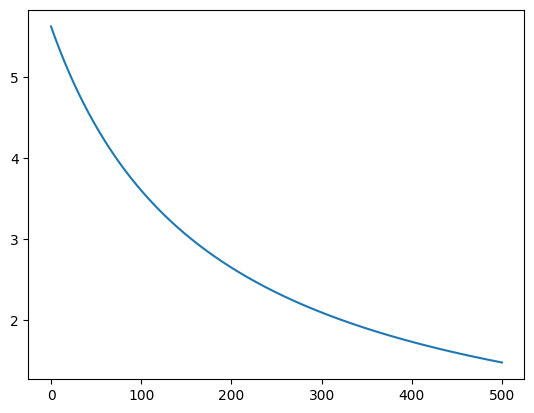

In [2]:
from matplotlib import pyplot as plt
from models import LogisticRegression, OptimalLR

model = LogisticRegression(10)
optimizer = torch.optim.SGD(model.parameters(), lr=1)
lr_scheduler = OptimalLR(optimizer, 0.001)
for i in range(500):
    lr_scheduler.step()

plt.plot(lr_scheduler.lr_history)


## Sparse SGD

In [421]:
from torch.optim import lr_scheduler

class CumulativeL1Model(PytorchBaseModel):
    """
    BatchSGDModel is a classifier derived from `PsupertimBaseModel` that wraps an `SGDClassifier`
    as logistic binary estimator.
    
    It overwrites the superclass `_binary_estimator_factory() and `fit()` methods. The latter is wrapping
    the `SGDClassifier.partial_fit()` function to fit the model in batches for a reduced memory footprint.
    
    """
    def __init__(self,
                 method="proportional",
                 early_stopping_batches=False,
                 n_batches=1,
                 max_iter=1000, 
                 random_state=1234, 
                 regularization=0.01, 
                 n_iter_no_change=5, 
                 early_stopping=True,
                 tol=1e-3,
                 learning_rate=0.1,
                 penalty='elasticnet', 
                 l1_ratio=1, 
                 shuffle=True, 
                 verbosity=0, 
                 epsilon=0.1, 
                 validation_fraction=0.1,
                 class_weight=None):

        self.method = method

        # model hyperparameters
        if not isinstance(penalty, str) or penalty not in ["l1", "l2", "elasticnet"]:
            raise ValueError("Parameter penalty must be one of 'l1', 'l2', 'elasticnet'. received: %s" % penalty)
        
        self.penalty = penalty
        if self.penalty == "l1":
            self.l1_ratio = 1
        elif self.penalty == "l2":
            self.l1_ratio = 0
        else:
            if not (0 <= l1_ratio and l1_ratio <= 1):
                raise ValueError("Parameter l1_ratio must be in the interval (0, 1). Received: %s" % l1_ratio)
            self.l1_ratio = l1_ratio
        
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state  # TODO: currently not used in torch optimizer!
        self.regularization = regularization
        self.shuffle = shuffle
        self.verbosity = verbosity
        self.epsilon = epsilon
        self.validation_fraction = validation_fraction
        self.class_weight = class_weight
        self.early_stopping = early_stopping
        self.n_iter_no_change = n_iter_no_change
        self.tol = tol
        self.n_batches = n_batches
        self.early_stopping_batches = early_stopping_batches

        # data attributes
        self.k_ = None
        self.intercept_ = []
        self.coef_ = []

        # training scores
        self.train_losses_ = []
        self.test_losses_ = []
        self.train_dof_ = []

    def _binary_estimator_factory(self):
        return None

    def fit(self, X, y, sample_weights=None):
        """Fit ordinal logistic model. 
        Multiclass data is converted to binarized representation and one weight per feature, 
        as well as a threshold for each class is fitted with a binary logistic classifier.

        Derived from a `sklearn.linear.SGDClassifier`, fitted in batches according to `self.n_batches` 
        for reduced memory usage.
        

        :param X: Data as 2d-matrix
        :type X: numpy.array or scipy.sparse
        :param y: ordinal labels
        :type y: Iterable
        :param sample_weight: Label weights for fitting and scoring, defaults to None. Can be used for example for class balancing.
        :type sample_weight: Iterable, optional
        :return: fitted classifier
        :rtype: BatchSGDModel
        """
        rng = np.random.default_rng(self.random_state)
        X, y = self._before_fit(X, y, sample_weights)

        if self.early_stopping:
            # TODO: This is a full copy of the input data -> split an index array instead and work with slices?
            X, X_test, y, y_test = train_test_split(X, y, test_size=self.validation_fraction, stratify=y, random_state=rng.integers(9999))
            
            # TODO: initializing binarized matrices for testing can be significant memory sink!
            y_test_bin = restructure_y_to_bin(y_test)
            del(y_test)

            if self.early_stopping_batches:
                n_test = X_test.shape[0]
                test_indices = np.arange(len(y_test_bin))
            else:
                X_test_bin = restructure_X_to_bin(X_test, self.k_)
                del(X_test)
        
        # diagonal matrix, to construct the binarized X per batch
        thresholds = np.identity(self.k_)
        if sparse.issparse(X):
            thresholds = sparse.csr_matrix(thresholds)

        n = X.shape[0]
        n_features = X.shape[1] + self.k_

        # Logistic regression model, defined as a perceptron
        model = LogisticRegression(input_dim=n_features)
        
        # Loss function: Binary Cross Entropy = Log loss
        criterion = torch.nn.BCELoss(reduction="none")

        # Adaptive momentum SGD optimizer
        optimizer = torch.optim.SGD(model.parameters(), lr=self.learning_rate)

        # learning rate
        #lr_schedule = lr_scheduler.MultiplicativeLR(optimizer, lambda epoch: 0.95)
        lr_schedule = OptimalLR(optimizer, self.regularization)

        # Sample weight to balance classes of y
        if sample_weights is None:
            sample_weights = torch.Tensor(np.ones_like(y))
        else:
            sample_weights = torch.Tensor(sample_weights)

        # Mask for applying penalty: Only apply to gene features, don't apply to thresholds
        penalty_mask = torch.Tensor(np.concatenate((np.ones(X.shape[1]), np.zeros(self.k_))))

        regularization = torch.tensor(self.regularization)
        
        # binarize only the labels already
        y_bin = torch.Tensor(restructure_y_to_bin(y))
        
        # create an index array and shuffle
        sampled_indices = rng.integers(len(y_bin), size=len(y_bin))

        # iterations over all data
        epoch = 0

        # tracking previous scores for early stopping
        best_score = - np.inf
        n_no_improvement = 0

        # cumulative penalty tracking
        u = torch.tensor(0.)
        q = torch.zeros(n_features)
        
        while epoch < self.max_iter:

            epoch += 1
            
            start = 0
            for i in range(1, self.n_batches+1):
                end = (i * len(y_bin) // self.n_batches)
                batch_idx = sampled_indices[start:end]
                batch_idx_mod_n = batch_idx % n
                batch_size = len(batch_idx)
                
                if sparse.issparse(X):
                    # TODO: Fix sparsity! Converting to dense format is a hack to get this to work
                    X_batch = torch.Tensor(sparse.hstack((X[batch_idx_mod_n], thresholds[batch_idx // n])).todense())
                else:
                    X_batch = torch.Tensor(np.hstack((X[batch_idx_mod_n,:], thresholds[batch_idx // n])))
                
                y_batch = y_bin[batch_idx]
                start = end
                sample_weights_batch = sample_weights[batch_idx_mod_n]

                # Set stored gradients to zero
                optimizer.zero_grad()
                
                # Forward pass
                outputs = model(X_batch)

                # calculate loss with and without regularization
                loss = (criterion(torch.squeeze(outputs), y_batch) * sample_weights_batch).mean()
               
                # backward pass and weight update
                loss.backward()
                optimizer.step()

                with torch.no_grad():
                    # Apply Cumulative penalty
                    weights, bias = tuple(model.parameters())
                    #l1_term = torch.linalg.vector_norm(penalty_mask * weights, 1)
                    
                    z = weights.data.squeeze().clone()

                    lr = torch.tensor(lr_schedule.get_last_lr())

                    #if self.l1_ratio < 1.0:
                    #    l2_scale = max(0, 1.0 - ((1.0 - self.l1_ratio) * lr * self.regularization))
                    #else:
                    #    l2_scale = 1
                    
                    # This is already the derivative of the L1 Term!
                    #u = u + lr * self.regularization / batch_size # orig u from paper
                    u = u + lr * self.regularization * self.l1_ratio + (1 - self.l1_ratio) * lr * self.regularization * z

                    #idx_wpos = (l2_scale * weights > 0).squeeze() * penalty_mask > 0
                    #idx_wneg = (l2_scale * weights < 0).squeeze() * penalty_mask > 0
                    idx_wpos = (weights > 0).squeeze() * penalty_mask > 0
                    idx_wneg = (weights < 0).squeeze() * penalty_mask > 0

                    #weights.data[0, idx_wpos] = torch.max(torch.tensor(0), weights[:, idx_wpos].squeeze() - (u + q[idx_wpos]) / l2_scale) 
                    #weights.data[0, idx_wneg] = torch.min(torch.tensor(0), weights[:, idx_wneg].squeeze() + (u - q[idx_wneg]) / l2_scale)
                    weights.data[0, idx_wpos] = torch.max(torch.tensor(0), weights[:, idx_wpos].squeeze() - (u[idx_wpos] + q[idx_wpos]))
                    weights.data[0, idx_wneg] = torch.min(torch.tensor(0), weights[:, idx_wneg].squeeze() + (u[idx_wneg] - q[idx_wneg]))

                    q = q + (weights.squeeze() - z)

                    self.train_losses_.append(loss.tolist())
                    self.train_dof_.append(weights.squeeze().count_nonzero().tolist())

            # Early stopping using the test data 
            if self.early_stopping:  # TODO: Disabled for now
                
                l1_term = torch.linalg.vector_norm(penalty_mask * weights, 1)
                l2_term = torch.linalg.vector_norm(penalty_mask * weights, 2) ** 2
                
                # build test data in batches as needed to avoid keeping in memory
                if self.early_stopping_batches:
                    scores = []
                    start = 0
                    for i in range(1, self.n_batches+1):
                        end = (i * len(y_test_bin) // self.n_batches)
                        batch_idx = test_indices[start:end]
                        batch_idx_mod_n = batch_idx % n_test
                        if sparse.issparse(X_test):
                            # TODO: Fix sparsity! Converting to dense format is a hack to get this to work
                            X_test_batch = torch.Tensor(sparse.hstack((X_test[batch_idx_mod_n], thresholds[batch_idx // n_test])).todense())
                        else:
                            X_test_batch = torch.Tensor(np.hstack((X_test[batch_idx_mod_n], thresholds[batch_idx // n_test])))
                        
                        with torch.no_grad():
                            outputs_test = model(X_test_batch)
                            # TODO: This is wrong! We are using two different losses for training and validation!
                            predicted_test = outputs_test.round().detach().numpy()
                            scores.append(metrics.accuracy_score(y_test_bin[batch_idx], predicted_test))
                            #loss = criterion(torch.squeeze(outputs_test), torch.Tensor(y_test_bin[batch_idx])).mean().tolist()
                            #loss += self.regularization * (self.l1_ratio * l1_term.to_list() + (1 - self.l1_ratio) * l2_term.to_list())
                            #scores.append(loss)

                        start = end          
                        
                    cur_score = np.mean(scores)
                
                else:
                    with torch.no_grad():
                        outputs_test = model(torch.Tensor(X_test_bin))
                        # TODO: This is wrong! We are using two different losses for training and validation!
                        predicted_test = model(torch.Tensor(X_test_bin)).round().detach().numpy()
                        cur_score = metrics.accuracy_score(y_test_bin, predicted_test)
                        #cur_score = criterion(torch.squeeze(outputs_test), torch.Tensor(y_test_bin[batch_idx])).mean().tolist()
                        #cur_score += self.regularization * (self.l1_ratio * l1_term.to_list() + (1 - self.l1_ratio) * l2_term.to_list())
                        
                self.test_losses_.append(cur_score)
                if cur_score - self.tol > best_score:
                    best_score = cur_score
                    n_no_improvement = 0
                else:
                    n_no_improvement += 1
                    if n_no_improvement >= self.n_iter_no_change:
                        if self.verbosity >= 2:
                            print("Stopped early at epoch ", epoch, " Current score:", cur_score)
                        break

            if self.shuffle:
                sampled_indices = rng.integers(len(y_bin), size=len(y_bin))

            # update learning rate
            lr_schedule.step()
            
        coef, intercept = tuple(model.parameters())
        coef = coef.detach().numpy().flatten()
        intercept = intercept.detach().numpy().flatten()
        self.coef_ = coef[:-self.k_]
        self.intercept_ = coef[-self.k_:] +  intercept

        self.is_fitted_ = True  # :)

        return self


In [4]:
from pypsupertime import Psupertime
from models import CumulativeL1Model

psuper = Psupertime(estimator_class=CumulativeL1Model,
                    estimator_params={"max_iter": 100, "tol": 1e-3, "penalty": "l1", "early_stopping": False},
                    regularization_params={"n_jobs": 5, "reg_high": 1, "reg_low": 0.0001, "n_params": 40},
                    preprocessing_params={"scale": True, "log": False, "smooth": False, "select_genes": "hvg"},
                   n_batches=1)

adata = psuper.run("/home/ubuntu/data/acinar_sce.h5ad", "donor_age")

Input Data: n_genes=23368, n_cells=411
Preprocessing: done. mode='hvg', n_genes=956, n_cells=411
Grid Search CV: CPUs=5, n_folds=5
Regularization: done   
Refit on all data: done. accuracy=0.369830.02, n_genes=76
Total elapsed time:  0:01:25.934575


Best idx: 29 Best Score: 0.3600646488392595 Best Lambda: 0.001060818355139448 Scores std: 0.09065562471992246
1SE idx: 16 1SE Score: 0.31389950044078757 1SE Lambda: 0.022854638641349907


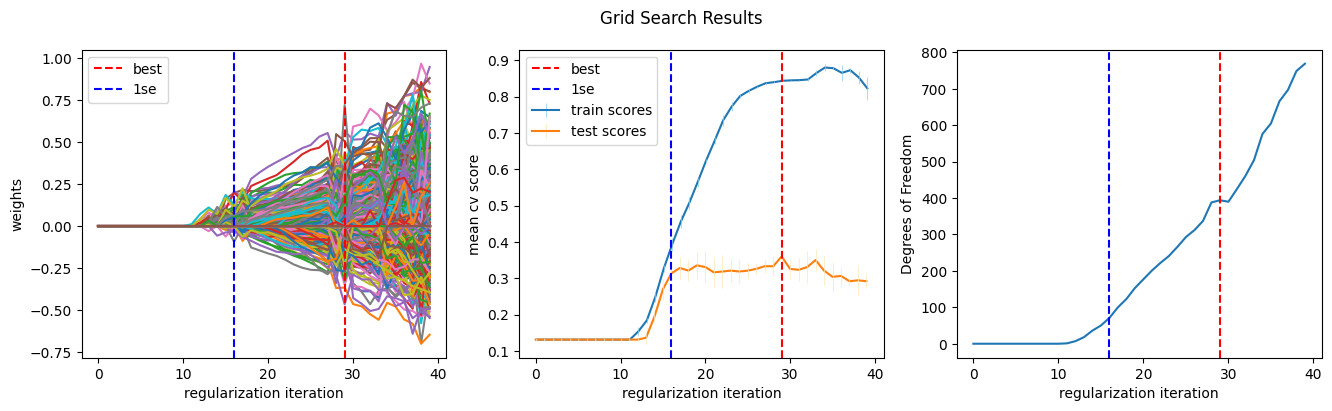

In [5]:
fig = psuper.plot_grid_search()
#fig.get_axes()[0].set_yscale("log")

In [424]:
psuper.refit_and_predict(adata, "best")

Input Data: n_genes=956, n_cells=411
Refit on all data: done. accuracy=0.583942.02, n_genes=440


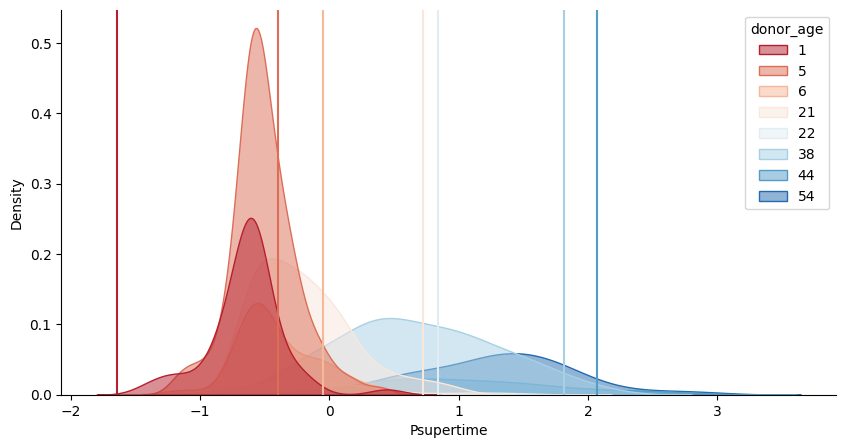

In [7]:
fig = psuper.plot_labels_over_psupertime(adata, "donor_age")

Model Degrees of freedom 76
Accuracy: 0.36982968369829683
Balanced accuracy: 0.2591374269005848
Mean absolute delta: 1.4789440286150812


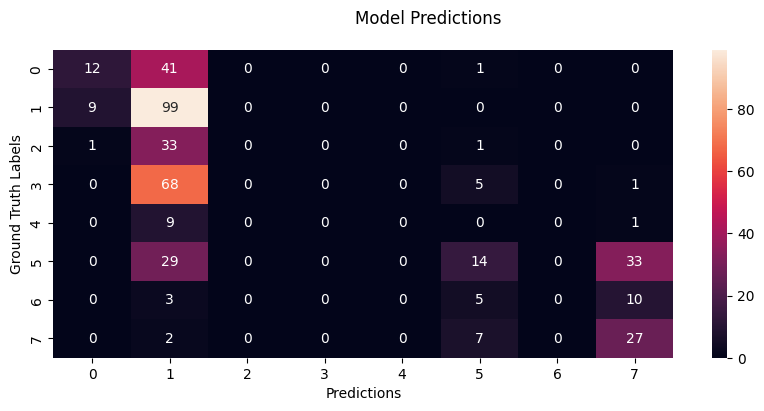

In [8]:
fig = psuper.plot_model_perf(train=(adata.X, adata.obs.donor_age))

# Compare Sklearn SGD, Threshold SGD, and Cumulative SGD

* Run Grid Search for each of the methods
* Run fixed number of iterations (n=100)
* Use "optimal" learning rate adjustments, L1 penalty for each model
* Collect training scores (Loss, DoF) for Best and 

In [1]:
from pypsupertime import Psupertime 

estimator_params={"max_iter": 100, "penalty": "l1", "early_stopping": False}
regularization_params={"n_jobs": 5, "reg_low": 0.0001, "n_params": 40}
preprocessing_params={"scale": True, "log": False, "smooth": False, "select_genes": "hvg"}

losses = {}
dof = {}

In [19]:
from models import BatchSGDModel

print("[1] SKLearn SGD Model: Penalty applied to all features (incl. thresholds)")
psuper1 = Psupertime(estimator_class=BatchSGDModel,
                    estimator_params=estimator_params,
                    regularization_params=regularization_params,
                    preprocessing_params=preprocessing_params,
                   n_batches=1)
adata = psuper1.run("/home/ubuntu/data/acinar_sce.h5ad", "donor_age")

losses[("sklearnsgd", "1se")] = psuper1.model.train_losses_
dof[("sklearnsgd", "1se")] = psuper1.model.train_dof_
print("... 1se lambda = %s" % psuper1.model.regularization)

psuper1.refit_and_predict(adata, "best")
losses[("sklearnsgd", "best")] = psuper1.model.train_losses_
dof[("sklearnsgd", "best")] = psuper1.model.train_dof_
print("... best lambda = %s" % psuper1.model.regularization)

[1] SKLearn SGD Model: Penalty applied to all features (incl. thresholds)
Input Data: n_genes=23368, n_cells=411
Preprocessing: done. mode='hvg', n_genes=956, n_cells=411
Grid Search CV: CPUs=5, n_folds=5
Regularization: done   
Refit on all data: done. accuracy=0.386861.02, n_genes=125
Total elapsed time:  0:02:26.985896
... 1se lambda = 0.028942661247167517
Input Data: n_genes=956, n_cells=411
Refit on all data: done. accuracy=0.992701.02, n_genes=933
... best lambda = 0.0001603718743751331


Best idx: 37 Best Score: 0.24334410813987656 Best Lambda: 0.0001603718743751331 Scores std: 0.04024037468993506
1SE idx: 15 1SE Score: 0.24087569791360566 1SE Lambda: 0.028942661247167517


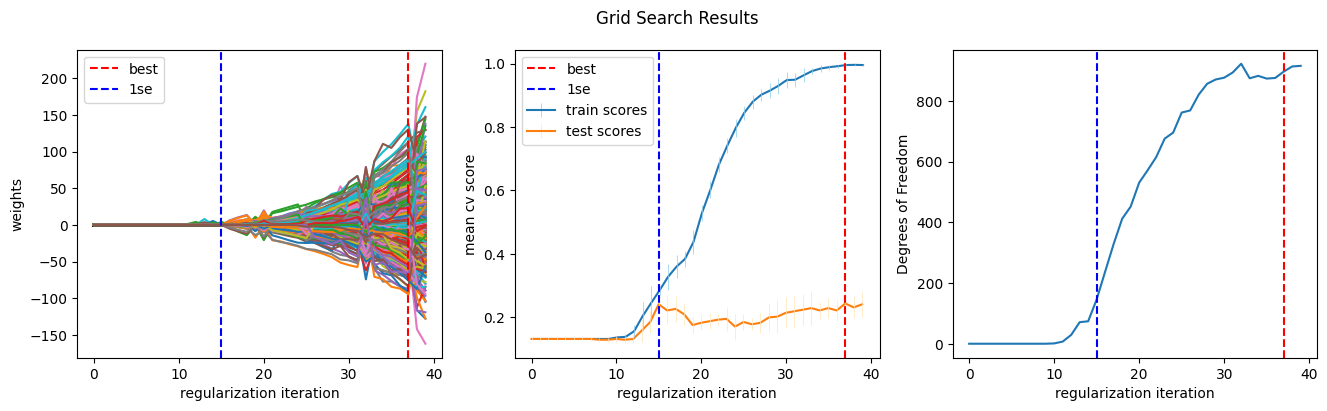

In [47]:
fig = psuper1.plot_grid_search()
fig.savefig("figures/sklearnsgd_gridsearch.png")

In [17]:
from models import TresholdPytorchModel
print("[2] Threshold SGD Model: Penalty mask (excl. thresholds) + cutoff at 0.001")
# Uses a differnt learning rate schedule
psuper2 = Psupertime(estimator_class=TresholdPytorchModel,
                    estimator_params={"learning_rate": 0.1, "sparsity_threshold": 0.001, **estimator_params},
                    regularization_params=regularization_params,
                    preprocessing_params=preprocessing_params,
                   n_batches=1)
adata = psuper2.run("/home/ubuntu/data/acinar_sce.h5ad", "donor_age")

losses[("threshsgd", "1se")] = psuper2.model.train_losses_
dof[("threshsgd", "1se")] = psuper2.model.train_dof_
print("... 1se lambda = %s" % psuper2.model.regularization)

psuper2.refit_and_predict(adata, "best")
losses[("threshsgd", "best")] = psuper2.model.train_losses_
dof[("threshsgd", "best")] = psuper2.model.train_dof_
print("... best lambda = %s" % psuper2.model.regularization)

[2] Threshold SGD Model: Penalty mask (excl. thresholds) + cutoff at 0.01
Input Data: n_genes=23368, n_cells=411
Preprocessing: done. mode='hvg', n_genes=956, n_cells=411
Grid Search CV: CPUs=5, n_folds=5
Regularization: done   
Refit on all data: done. accuracy=0.131387.02, n_genes=815
Total elapsed time:  0:01:25.248069
... 1se lambda = 0.028942661247167517
Input Data: n_genes=956, n_cells=411
Refit on all data: done. accuracy=0.131387.02, n_genes=162
... best lambda = 0.004375479375074184


Best idx: 23 Best Score: 0.17272994416691154 Best Lambda: 0.004375479375074184 Scores std: 0.018083585077645317
1SE idx: 15 1SE Score: 0.16300323244196296 1SE Lambda: 0.028942661247167517


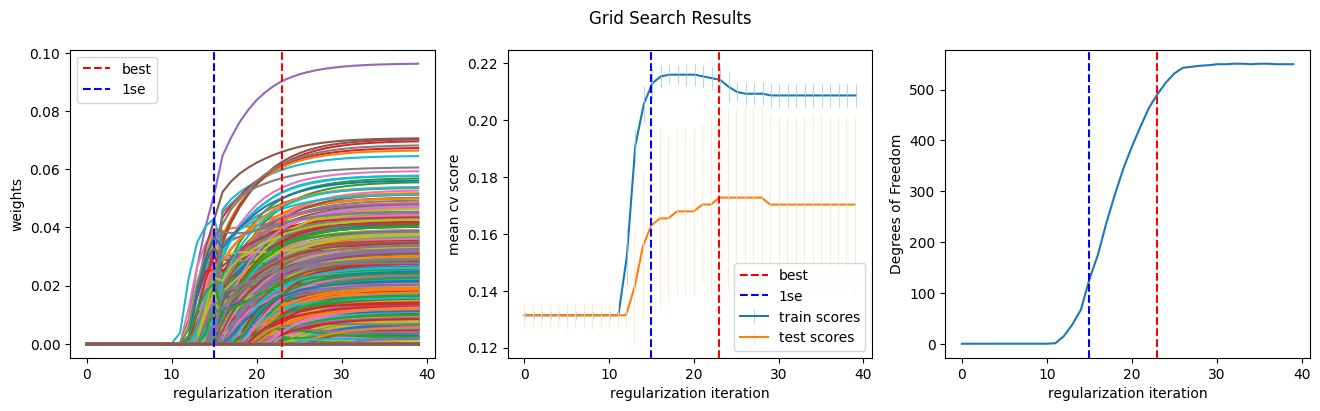

In [43]:
fig = psuper2.plot_grid_search()
fig.savefig("figures/treshsgd_gridsearch.png")

In [20]:
from models import CumulativeL1Model

print("[3] Cumulative Penalty SGD Model: Penalty mask (excl. thresholds) + Cumulative L1 Penalty")
psuper3 = Psupertime(estimator_class=CumulativeL1Model,
                    estimator_params=estimator_params,
                    regularization_params=regularization_params,
                    preprocessing_params=preprocessing_params,
                   n_batches=1)
adata = psuper3.run("/home/ubuntu/data/acinar_sce.h5ad", "donor_age")

losses[("cumpensgd", "1se")] = psuper3.model.train_losses_
dof[("cumpensgd", "1se")] = psuper3.model.train_dof_
print("... 1se lambda = %s" % psuper3.model.regularization)

psuper3.refit_and_predict(adata, "best")
losses[("cumpensgd", "best")] = psuper3.model.train_losses_
dof[("cumpensgd", "best")] = psuper3.model.train_dof_
print("... best lambda = %s" % psuper3.model.regularization)

[3] Cumulative Penalty SGD Model: Penalty mask (excl. thresholds) + Cumulative L1 Penalty
Input Data: n_genes=23368, n_cells=411
Preprocessing: done. mode='hvg', n_genes=956, n_cells=411
Grid Search CV: CPUs=5, n_folds=5
Regularization: done   
Refit on all data: done. accuracy=0.374696.02, n_genes=75
Total elapsed time:  0:01:21.365085
... 1se lambda = 0.022854638641349907
Input Data: n_genes=956, n_cells=411
Refit on all data: done. accuracy=0.836983.02, n_genes=445
... best lambda = 0.001060818355139448


Best idx: 29 Best Score: 0.347840141052013 Best Lambda: 0.001060818355139448 Scores std: 0.08959646567294598
1SE idx: 16 1SE Score: 0.3163385248310315 1SE Lambda: 0.022854638641349907


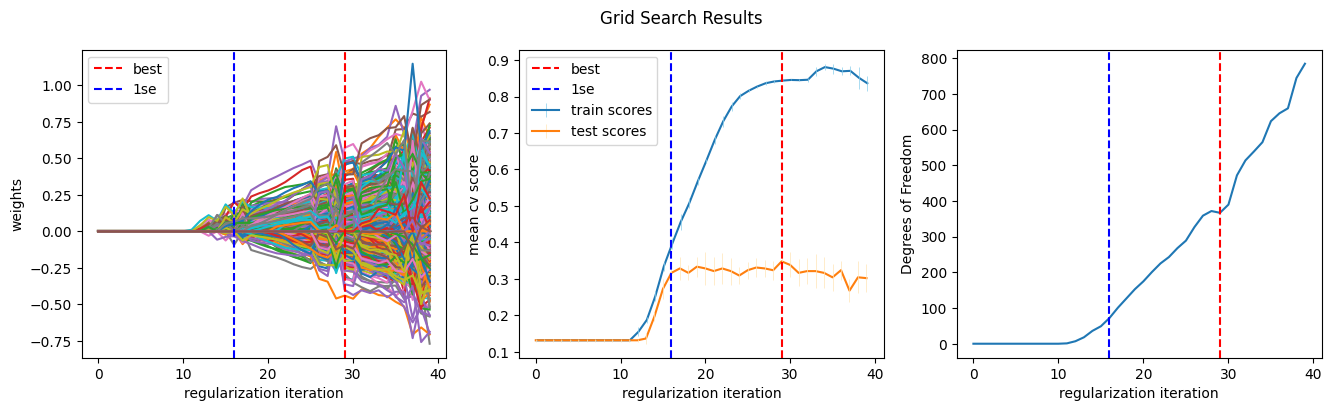

In [46]:
fig = psuper3.plot_grid_search()
fig.savefig("figures/cumpenaltysgd_gridsearch.png")

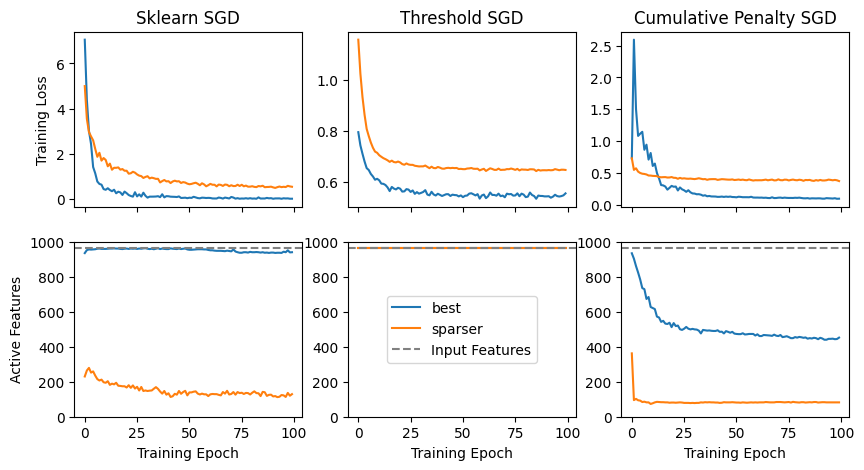

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

num_features_in = 956 + 7 +1 # hvg_genes + k

losses_df = pd.DataFrame.from_dict(losses)
dof_df = pd.DataFrame.from_dict(dof)

fig, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(ncols=3, nrows=2, figsize=(10,5), sharex=True, sharey=False)
a1.plot(losses_df[("sklearnsgd", "best")], label="best")
a1.plot(losses_df[("sklearnsgd", "1se")], label="sparser")
a1.set_title("Sklearn SGD")

a2.plot(losses_df[("threshsgd", "best")], label="best")
a2.plot(losses_df[("threshsgd", "1se")], label="sparser")
a2.set_title("Threshold SGD")

a3.plot(losses_df[("cumpensgd", "best")], label="best")
a3.plot(losses_df[("cumpensgd", "1se")], label="sparser")
a3.set_title("Cumulative Penalty SGD")

a4.plot(dof_df[("sklearnsgd", "best")], label="best")
a4.plot(dof_df[("sklearnsgd", "1se")], label="sparser")
a4.axhline(num_features_in, linestyle="dashed", color="grey", label="Input Features")
a4.set_ylim((0,1000))

a5.plot(dof_df[("threshsgd", "best")], label="best")
a5.plot(dof_df[("threshsgd", "1se")], label="sparser")
a5.axhline(num_features_in, linestyle="dashed", color="grey", label="Input Features")
a5.set_ylim((0,1000))
a5.legend(loc="center")

a6.plot(dof_df[("cumpensgd", "best")], label="best")
a6.plot(dof_df[("cumpensgd", "1se")], label="sparser")
a6.axhline(num_features_in, linestyle="dashed", color="grey", label="Input Features")
a6.set_ylim((0,1000))

a1.set_ylabel("Training Loss")
a4.set_ylabel("Active Features")
a4.set_xlabel("Training Epoch")
a5.set_xlabel("Training Epoch")
a6.set_xlabel("Training Epoch")

fig.savefig("figures/loss_curves.png")


Text(0, 0.5, 'Num Nonzero Features')

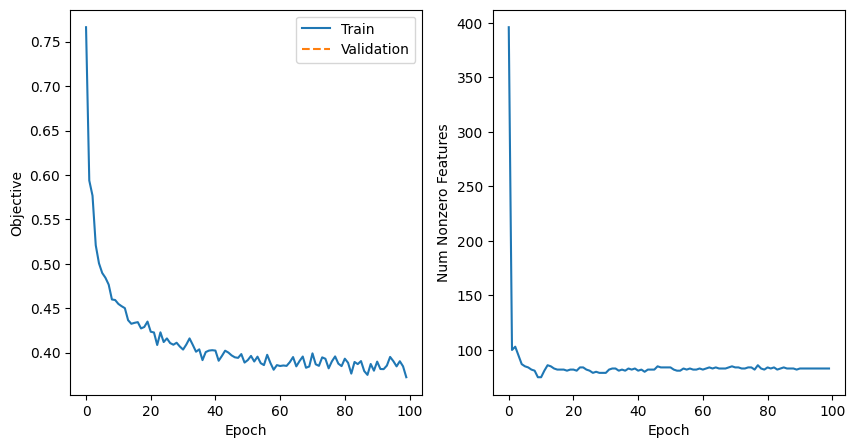

In [6]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax1.plot(psuper.model.train_losses_, label="Train")
ax1.plot(psuper.model.test_losses_, linestyle="dashed", label="Validation")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Objective")
ax1.legend()

ax2.plot(psuper.model.train_dof_)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Num Nonzero Features")